# 📧🐷🚫**Job Offer Spam Detection**
This deep learning model leverages Long Short-Term Memory (LSTM) networks to
detect spam in job offer messages with high precision.
By capturing sequential patterns and contextual cues in text, the model
distinguishes legitimate opportunities from deceptive or unsolicited content.
Designed for real-world deployment, it reflects a strategic blend of NLP
preprocessing, tokenization, and temporal modeling—ideal for inbox filtering,
recruitment platforms, or fraud prevention systems.

In [1]:
!pip install kagglehub[pandas-datasets]

You should consider upgrading via the 'F:\MachineLearning\SCC_ML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### 📚**Creating the dataset**
In the process of creating the dataset, the dataset is created manually by using the existing datasets online. Since there are no datasets for job spam and ham, I will use the dataset of [Rashmi Shree](https://www.kaggle.com/datasets/rasho330/job-application-email-anonymized-and-feature-rich?select=job_app_confirmation_emails_anonymized.csv) of Job Application Email. The *email body* column is extracted and label them as ham.

Moreover, the dataset of [Puru Singhvi](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset) was used to retrieve samples of spam and ham email datasets.

In [ ]:
# Importing the necessary packages
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

f:\MachineLearning\SCC_ML\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Downloading the Datasets
job_application = kagglehub.dataset_download("rasho330/job-application-email-anonymized-and-feature-rich")
spam_ham = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

100%|██████████| 106k/106k [00:00<00:00, 288kB/s]

Extracting files...


100%|██████████| 43.0M/43.0M [00:06<00:00, 6.57MB/s]

Extracting files...


In [4]:
# Check the directory
print(os.listdir(job_application))
print(os.listdir(spam_ham))

# Navigate to the csv
job_application_dataset = os.path.join(job_application, "job_app_confirmation_emails_anonymized.csv")
spam_ham_dataset = os.path.join(spam_ham, "combined_data.csv")

['job_app_confirmation_emails_anonymized.csv']
['combined_data.csv']


In [5]:
# Loading the dataset in a pandas dataframe
job_application_df = pd.read_csv(job_application_dataset)
spam_ham_df = pd.read_csv(spam_ham_dataset)

display(job_application_df.head())
display(spam_ham_df)

,Unnamed: 0,sender,date,parsed_datetime,date_only,week,month,year,days_since,email_body,company,subject
0,0,Tesco Careers <noreply.careers@tesco.com>,"4/2/25, 1:30 AM",2025-04-02 01:30:00,2025-04-02,14,4,2025,9,"Hello Micheal Gary Scott, \n \nWe’ve received ...",Tesco,Decision Scientist at Tesco: we’ve got your ap...
1,1,LinkedIn <jobs-noreply@linkedin.com>,"4/2/25, 1:22 AM",2025-04-02 01:22:00,2025-04-02,14,4,2025,9,Your application was sent to Healthify\n͏ ͏ ͏ ...,Healthify,"Michael Gary Scott, your application was sent ..."
2,2,noreply@mail.amazon.jobs,"4/2/25, 1:18 AM",2025-04-02 01:18:00,2025-04-02,14,4,2025,9,Thank you for Applying to Amazon!\nAmazon.jobs...,Amazon,Thank you for Applying to Amazon!
3,3,IBM Talent Acquisition <talent@ibm.com>,"4/2/25, 1:11 AM",2025-04-02 01:11:00,2025-04-02,14,4,2025,9,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,IBM,You have successfully submitted your IBM job a...
4,4,IBM Talent Acquisition <talent@ibm.com>,"4/2/25, 1:09 AM",2025-04-02 01:09:00,2025-04-02,14,4,2025,9,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,IBM,Your IBM Application: Next Steps


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [6]:
# Creating a dataframe for job emails and labeling them 0 (Ham)
job_emails_df = pd.DataFrame(job_application_df["email_body"]) # Extracting the email_body column
job_emails_df["label"] = 0 # Creating a new label and labeling them as HAM (0)

# Rename the email_body column to text
job_emails_df.rename(columns={"email_body": "text"}, inplace=True) # Rename the column "email_body" to "text"

display(job_emails_df)

,text,label
0,"Hello Micheal Gary Scott, \n \nWe’ve received ...",0
1,Your application was sent to Healthify\n͏ ͏ ͏ ...,0
2,Thank you for Applying to Amazon!\nAmazon.jobs...,0
3,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,0
4,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,0
...,...,...
492,"\nDear Michael Gary Scott,\nThank you for your...",0
493,Hello Michael Gary Scott -\nWe really apprecia...,0
494,"Dear Michael Gary Scott,\nThank you for your i...",0
495,{Other.Company\nDear Michael Gary Scott:\n \nT...,0


In [7]:
# Dropping 50% of the ham (0) and 50% of the spam emails in the spam and ham dataset
ham_emails = spam_ham_df[spam_ham_df['label'] == 0].sample(frac=0.5, random_state=42)
spam_emails = spam_ham_df[spam_ham_df['label'] == 1].sample(frac=0.5, random_state=42)

spam_ham_copy = pd.concat([ham_emails, spam_emails]).sample(frac=1).reset_index(drop=True)

display(spam_ham_copy)

,label,text
0,1,oem software means no cd dvd no packing case n...
1,1,after all the genuine thing escapenumber with ...
2,1,just take a look at this one target sym wdscpr...
3,1,"hi ,\ni sent you an email last week and just w..."
4,1,from the desk of : barr arisman shonikon\ncham...
...,...,...
41719,1,adobe dreamweaver csescapenumber escapenumber ...
41720,1,"generic cialis ( regalis ) , at cheap prices ...."
41721,0,on jun escapenumber escapenumber at escapenumb...
41722,1,animists flask princelet undoctrinal hemarthro...


I dropped **50% of both ham and spam samples** from the spam_ham dataset before merging it with the job_emails dataset. This step prevents class imbalance and ensures the model learns richer, job‑related vocabulary for more accurate spam detection.

In [8]:
# Concatenating the datasets
original_df = pd.concat([job_emails_df, spam_ham_copy], ignore_index=True)

display(original_df)

,text,label
0,"Hello Micheal Gary Scott, \n \nWe’ve received ...",0
1,Your application was sent to Healthify\n͏ ͏ ͏ ...,0
2,Thank you for Applying to Amazon!\nAmazon.jobs...,0
3,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,0
4,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,0
...,...,...
42216,adobe dreamweaver csescapenumber escapenumber ...,1
42217,"generic cialis ( regalis ) , at cheap prices ....",1
42218,on jun escapenumber escapenumber at escapenumb...,0
42219,animists flask princelet undoctrinal hemarthro...,1


## 🔍**Exploratory Data Analysis (EDA)**
In this section, I examine the structure and quality of the combined dataset of job-related and spam/ham emails. The goal is to uncover patterns, detect anomalies, and identify potential data quality issues before model training. By analyzing distributions, text lengths, class balance, and common linguistic features, I ensure the dataset is clean, representative, and suitable for building a robust LSTM-based spam detection model.

In [9]:
# Create a copy of the combined df
df = original_df.copy()

# Check shape
print(f"Dataset Shape: {df.shape}")

# Check datatypes
print(f"\nDataset Datatypes: \n{df.dtypes}")

# Check missing values
print(f"\nDataset Missing Values: \n{df.isnull().sum()}")

Dataset Shape: (42221, 2)

Dataset Datatypes: 
text     object
label     int64
dtype: object

Dataset Missing Values: 
text     3
label    0
dtype: int64


#### 🧽**Basic Cleaning**
The cleaning process involved removing null values and duplicates. Since there were only **3 null entries**, dropping them had no significant impact on the dataset. Similarly, **30 duplicate records** were removed, which is negligible given the dataset’s size and does not affect the model’s outcome.

In [10]:
# Drop null values for text
df.dropna(inplace=True)

# Check if there are null values again
print(f"\nDataset Missing Values: \n{df.isnull().sum()}")

# Count duplicate messages
print(f"\nDuplicate Messages: {df.duplicated().sum()}")

# Show 5 samples of duplicate messages
print(f"\nSamples of Duplicate Messages:")
display(df[df.duplicated()]['text'].head())

# Dropping duplicated messages
df.drop_duplicates(inplace=True)


Dataset Missing Values: 
text     0
label    0
dtype: int64

Duplicate Messages: 30

Samples of Duplicate Messages:


8     Micheal Gary Scott,\nThank you for your intere...
32    Hi Michael Gary Scott V,\nThanks for applying ...
78    TEKsystems: Own Change\nHi Michael Gary Scott,...
87    Thank you for your interest in LexisNexis Risk...
93    TEKsystems: Own Change\nHi Michael Gary Scott,...
Name: text, dtype: object

Class Balance: 
label
1    21955
0    20233
Name: count, dtype: int64


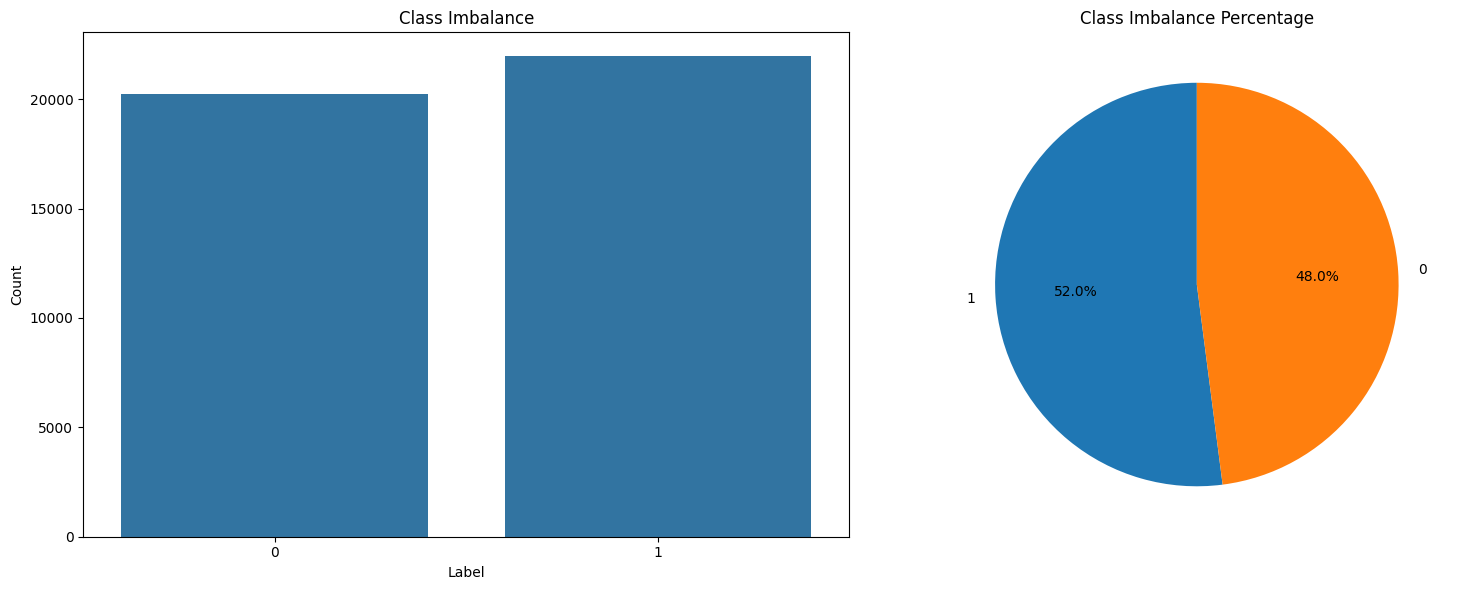

In [11]:
# Detect class imbalance
class_balance = df["label"].value_counts()
print(f"Class Balance: \n{class_balance}")

# Plot class imbalance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=class_balance.index, y=class_balance.values, ax=axes[0])
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")
axes[0].set_title("Class Imbalance")

axes[1].pie(class_balance, labels=class_balance.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Class Imbalance Percentage")

plt.tight_layout()
plt.show()

The dataset is well balanced, with only about a **4% difference between** classes. This slight variation is negligible and does not significantly affect the training process.

In [12]:
# Ensuring text quality

# Removing Line breaks "\n"
df['text'] = df['text'].str.replace('\n', ' ')

display(df.head())

# Count short and long messages
print("\nNumber of Long messages:", df[df['text'].str.len() > 1000].shape[0])
print("Number of Short messages:", df[df['text'].str.len() < 100].shape[0])

,text,label
0,"Hello Micheal Gary Scott, We’ve received yo...",0
1,Your application was sent to Healthify ͏ ͏ ͏ ͏...,0
2,Thank you for Applying to Amazon! Amazon.jobs ...,0
3,IBM Careers IBM Careers IBM Dear Micheal Ga...,0
4,IBM Careers IBM Careers IBM Ref: 14499 - Bu...,0



Number of Long messages: 18869
Number of Short messages: 1374


The process involved removing line breaks to ensure the model focuses on vocabulary and linguistic patterns rather than formatting artifacts.

In [13]:
# Removing short messages since job offers are rarely short.
df = df[df['text'].str.len() > 100]

display(df)

,text,label
0,"Hello Micheal Gary Scott, We’ve received yo...",0
1,Your application was sent to Healthify ͏ ͏ ͏ ͏...,0
2,Thank you for Applying to Amazon! Amazon.jobs ...,0
3,IBM Careers IBM Careers IBM Dear Micheal Ga...,0
4,IBM Careers IBM Careers IBM Ref: 14499 - Bu...,0
...,...,...
42215,believed or pretended to believe that her husb...,1
42216,adobe dreamweaver csescapenumber escapenumber ...,1
42217,"generic cialis ( regalis ) , at cheap prices ....",1
42218,on jun escapenumber escapenumber at escapenumb...,0


Since most job offers are medium to long length. We remove the short character texts in the dataset.

C:\Users\marti\AppData\Local\Temp\ipykernel_18628\2607748484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')


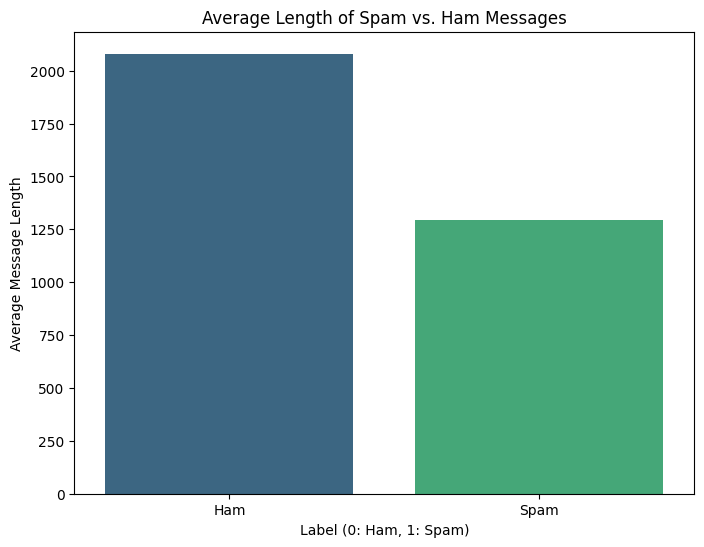

In [14]:
# Compare the average lenght of spam vs ham messages
average_lengths = df.groupby('label')['text'].apply(lambda x: x.str.len().mean())

# Plot the differences with color distinction
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Average Message Length')
plt.title('Average Length of Spam vs. Ham Messages')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

Ham messages are, on average, much longer than spam messages — showing that legitimate emails tend to contain more detailed content, while spam is usually shorter.

## 🤖 **Creating the Model**
The model is built using PyTorch and uses RNN's Long Short-Term Memory (LSTM) networks to capture sequential dependencies in text. By transforming raw job offer messages into tokenized and padded sequences, the model learns contextual patterns that distinguish legitimate job opportunities from spam. The architecture combines an embedding layer, an LSTM encoder, and a dense classification layer, optimized with binary cross-entropy loss. This design ensures robust detection performance while remaining interpretable and adaptable for real-world deployment.

### Preparing the data
The preprocessing pipeline was designed to transform raw text into a format suitable for LSTM training. The steps included:
- **Splitting the dataset** into training, validation, and test sets to ensure fair evaluation.
- **Tokenizing** the text using a *HuggingFace* tokenizer to break messages into subword units.
- **Encoding and padding sequences** to create uniform input lengths for the model.
- **Wrapping the data into PyTorch Dataset and DataLoader** objects for efficient batching, shuffling, and GPU‑ready training.

In [15]:
# Split data into training, validation, and test split
from sklearn.model_selection import train_test_split

# First split: 80% for training+validation, 20% for test
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Second split: 70% of the remaining (80%) for training, 30% for validation (which is 20% of the original data)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (24477, 2)
Validation data shape: (8159, 2)
Test data shape: (8159, 2)


#### **Tokenizing**

In [16]:
# Tokenize message using huggingface
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

In [ ]:
# Break each message into tokens

# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

# Pre-tokenize the text using whitespace
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Train the tokenizer on the training data
tokenizer.train_from_iterator(train_df['text'], trainer=trainer)

# Function to tokenize text in a dataframe
def tokenize_dataframe(df, tokenizer):
    df['tokenized_text'] = df['text'].apply(lambda x: tokenizer.encode(x).ids)
    return df

# Tokenize the text in the training, validation, and test sets
train_df = tokenize_dataframe(train_df, tokenizer)
val_df = tokenize_dataframe(val_df, tokenizer)
test_df = tokenize_dataframe(test_df, tokenizer)

# Display the first few rows of the tokenized training data
display(train_df.head())

,text,label,tokenized_text
3159,green it wash it's use not expert some current...,1,"[2459, 328, 8744, 328, 24, 100, 516, 418, 4534..."
29997,the permanent fix to penis growth limited offe...,1,"[320, 5936, 1340, 322, 3168, 2653, 2235, 954, ..."
17832,this one is being promoted take advantage ca m...,1,"[390, 431, 321, 1146, 7713, 972, 3419, 304, 10..."
12016,with our pills she'll be speechless and defian...,1,"[396, 403, 687, 836, 24, 584, 348, 2218, 1087,..."
31003,almighty electrolysis lottie deaconess alexand...,1,"[22419, 11994, 26197, 921, 4496, 25810, 381, 1..."


In [18]:
# Encode text
import torch
from torch.nn.utils.rnn import pad_sequence

# Get the vocabulary size
vocab_size = tokenizer.get_vocab_size()
print(f"Vocabulary size: {vocab_size}")

# Define the maximum sequence length
max_len = 128

def encode_and_pad(df, tokenizer, max_len):
    # Pad the tokenized sequences and convert to tensors
    sequences = [torch.tensor(seq) for seq in df['tokenized_text']]
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=tokenizer.token_to_id("[PAD]"))[:, :max_len]

    # Ensure all sequences have the same length after slicing
    padded_sequences = torch.nn.functional.pad(padded_sequences, (0, max_len - padded_sequences.shape[1]), value=tokenizer.token_to_id("[PAD]"))

    # Convert labels to tensors
    labels = torch.tensor(df['label'].values)

    return padded_sequences, labels

train_padded_sequences, train_labels = encode_and_pad(train_df, tokenizer, max_len)
val_padded_sequences, val_labels = encode_and_pad(val_df, tokenizer, max_len)
test_padded_sequences, test_labels = encode_and_pad(test_df, tokenizer, max_len)

print(f"\nShape of training sequences: {train_padded_sequences.shape}")
print(f"Shape of validation sequences: {val_padded_sequences.shape}")
print(f"Shape of test sequences: {test_padded_sequences.shape}")

print(f"\nShape of training labels: {train_labels.shape}")
print(f"Shape of validation labels: {val_labels.shape}")
print(f"Shape of test labels: {test_labels.shape}")

Vocabulary size: 30000

Shape of training sequences: torch.Size([24477, 128])
Shape of validation sequences: torch.Size([8159, 128])
Shape of test sequences: torch.Size([8159, 128])

Shape of training labels: torch.Size([24477])
Shape of validation labels: torch.Size([8159])
Shape of test labels: torch.Size([8159])


In [19]:
# Wrap the padded sequence and labels into a Dataset
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_padded_sequences, train_labels)
val_dataset = TensorDataset(val_padded_sequences, val_labels)
test_dataset = TensorDataset(test_padded_sequences, test_labels)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 24477
Validation dataset size: 8159
Test dataset size: 8159


In [20]:
# Using a DataLoader to batch them, shuffle training data, and feed them efficiently into the model.
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

print(f"Number of batches in training dataloader: {len(train_dataloader)}")
print(f"Number of batches in validation dataloader: {len(val_dataloader)}")
print(f"Number of batches in test dataloader: {len(test_dataloader)}")

Number of batches in training dataloader: 383
Number of batches in validation dataloader: 128
Number of batches in test dataloader: 128


### **Model Creation**

In [21]:
from torch.nn import LSTM
import torch.nn as nn

# Define LSTM hyperparameters
embedding_dim = 100 # Dimension of the word embeddings
hidden_dim = 256 # Number of hidden units in the LSTM
output_dim = 1 # Output dimension (1 for binary classification)
num_layers = 3 # Number of LSTM layers
bidirectional = True # Whether the LSTM is bidirectional
dropout = 0.3 # Dropout rate

In [22]:
# LSTM Model Definition
class LSTMSpamClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, bidirectional, dropout):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = LSTM(embedding_dim,
                         hidden_dim,
                         num_layers=num_layers,
                         bidirectional=bidirectional,
                         dropout=dropout,
                         batch_first=True)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text = [batch size, seq len]

        embedded = self.dropout(self.embedding(text))
        # embedded = [batch size, seq len, emb dim]

        output, (hidden, cell) = self.lstm(embedded)
        # output = [batch size, seq len, hidden dim * num directions]
        # hidden = [num layers * num directions, batch size, hidden dim]
        # cell = [num layers * num directions, batch size, hidden dim]

        # Concatenate the final forward and backward hidden states
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]
        # hidden = [batch size, hidden dim * num directions]

        dense_output = self.fc(hidden)
        # dense_output = [batch size, output dim]

        return dense_output

In [23]:
import torch.optim as optim

# Instantiate the model
model = LSTMSpamClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, bidirectional, dropout)

# Define Loss Function (BCEWithLogitsLoss)
criterion = nn.BCEWithLogitsLoss()

# Define Optimizer (ADAM)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

### **Training Loop**

In [25]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 correct, this returns 0.8.
    """
    # Round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() # Convert to float for division
    acc = correct.sum() / len(correct)
    return acc

# Training function
def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in dataloader:
        text, labels = batch
        text = text.to(device)
        labels = labels.to(device).float().unsqueeze(1) # Ensure labels are float and have shape [batch_size, 1]

        optimizer.zero_grad()

        predictions = model(text)

        loss = criterion(predictions, labels)

        acc = binary_accuracy(predictions, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

# Evaluation function
def evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []

    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            predictions = model(text)

            loss = criterion(predictions, labels)

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            # Store predictions and labels for metrics calculation
            rounded_preds = torch.round(torch.sigmoid(predictions))
            all_preds.append(rounded_preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Concatenate all predictions and labels
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)


    return epoch_loss / len(dataloader), epoch_acc / len(dataloader), precision, recall, f1, all_labels, all_preds

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [27]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store metrics
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []
valid_precisions = []
valid_recalls = []
valid_f1s = []


# Training loop
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion, device)

    # Call the modified evaluate function
    valid_loss, valid_acc, valid_precision, valid_recall, valid_f1, valid_labels, valid_preds = evaluate(model, val_dataloader, criterion, device)

    # Store metrics
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    valid_precisions.append(valid_precision)
    valid_recalls.append(valid_recall)
    valid_f1s.append(valid_f1)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'spam-ham-detection-best-model.pt')

    print(f'Epoch: {epoch+1:02}')
    # Displays the output for each epoch
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Valid. Loss: {valid_loss:.3f} | Valid. Acc: {valid_acc*100:.2f}%')
    print(f'\t Precision: {valid_precision:.3f} | Recall: {valid_recall:.3f} | F1: {valid_f1:.3f}')

Epoch: 01
	Train Loss: 0.404 | Train Acc: 81.87%
	 Valid. Loss: 0.283 | Valid. Acc: 88.16%
	 Precision: 0.881 | Recall: 0.884 | F1: 0.883
Epoch: 02
	Train Loss: 0.287 | Train Acc: 88.17%
	 Valid. Loss: 0.208 | Valid. Acc: 91.54%
	 Precision: 0.899 | Recall: 0.939 | F1: 0.918
Epoch: 03
	Train Loss: 0.219 | Train Acc: 91.45%
	 Valid. Loss: 0.178 | Valid. Acc: 93.03%
	 Precision: 0.900 | Recall: 0.971 | F1: 0.934
Epoch: 04
	Train Loss: 0.168 | Train Acc: 93.74%
	 Valid. Loss: 0.143 | Valid. Acc: 94.72%
	 Precision: 0.927 | Recall: 0.973 | F1: 0.949
Epoch: 05
	Train Loss: 0.142 | Train Acc: 94.68%
	 Valid. Loss: 0.121 | Valid. Acc: 95.81%
	 Precision: 0.949 | Recall: 0.969 | F1: 0.959
Epoch: 06
	Train Loss: 0.123 | Train Acc: 95.57%
	 Valid. Loss: 0.144 | Valid. Acc: 94.97%
	 Precision: 0.920 | Recall: 0.987 | F1: 0.952
Epoch: 07
	Train Loss: 0.105 | Train Acc: 96.30%
	 Valid. Loss: 0.097 | Valid. Acc: 96.74%
	 Precision: 0.964 | Recall: 0.971 | F1: 0.968
Epoch: 08
	Train Loss: 0.096 | Tra

#### **Train and Val Graph Comparison**

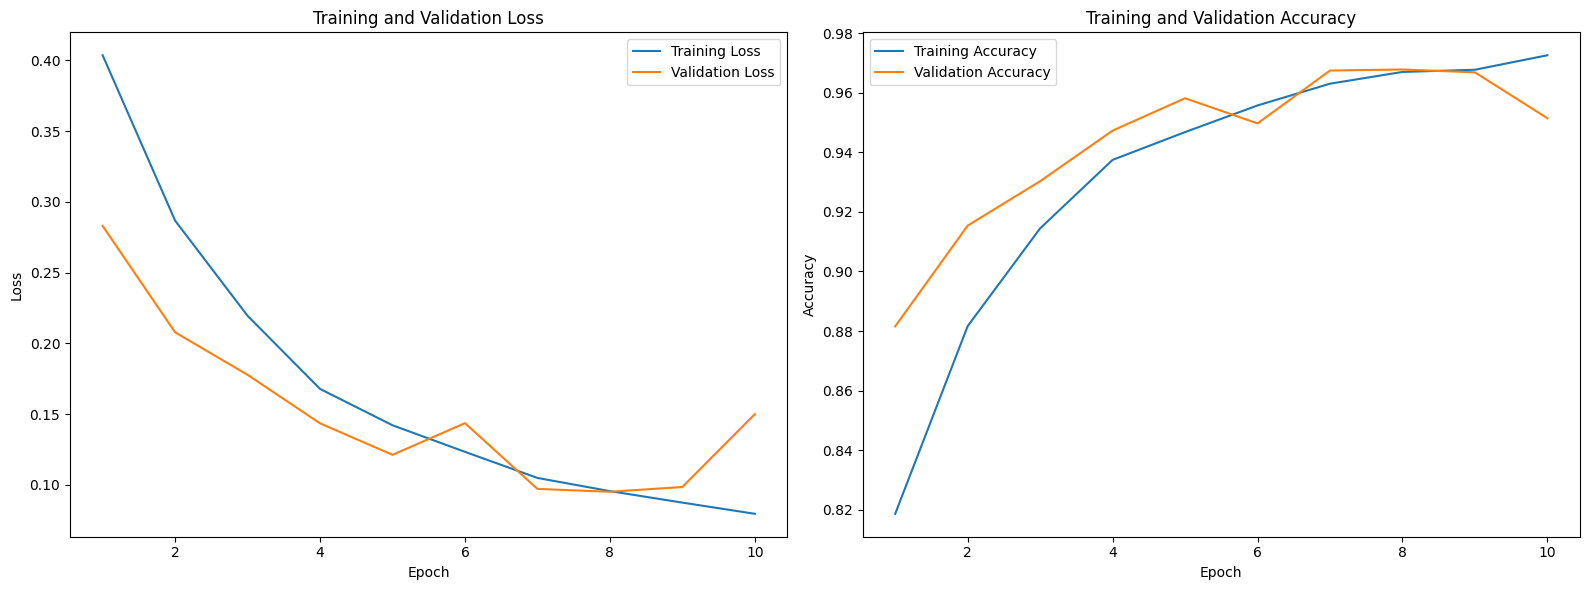

In [28]:
# Plot training and validation loss and accuracy
import matplotlib.pyplot as plt

epochs = range(1, N_EPOCHS + 1)

plt.figure(figsize=(16, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label='Training Accuracy')
plt.plot(epochs, valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### **Testing**

In [29]:
# Evaluation function for the test set
def test_evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []

    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            predictions = model(text)

            loss = criterion(predictions, labels)

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            rounded_preds = torch.round(torch.sigmoid(predictions))
            all_preds.append(rounded_preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader), precision, recall, f1, all_labels, all_preds

# Run the model on test set
model.load_state_dict(torch.load('spam-ham-detection-best-model.pt'))

test_loss, test_acc, test_precision, test_recall, test_f1, test_labels, test_preds = test_evaluate(model, test_dataloader, criterion, device)

Test Loss: 0.091 | Test Acc: 96.96%
Test Precision: 0.961 | Test Recall: 0.981 | Test F1: 0.971


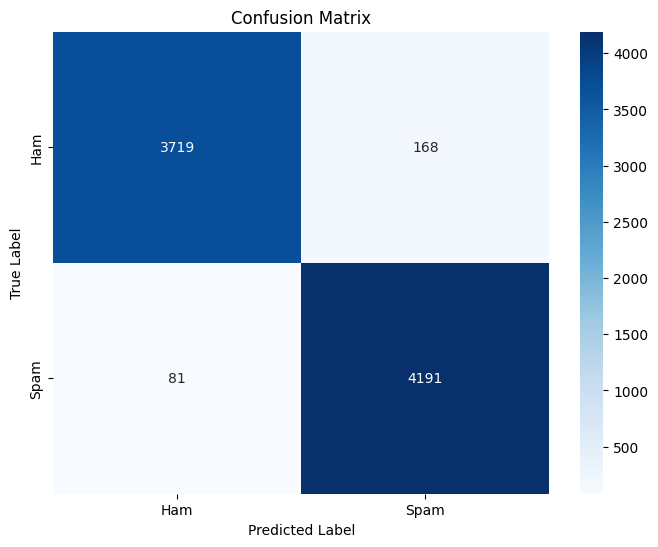

In [30]:
# Show final metrics
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')
print(f'Test Precision: {test_precision:.3f} | Test Recall: {test_recall:.3f} | Test F1: {test_f1:.3f}')

# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Creating an Inference Pipeline

In [31]:
import torch

def predict_spam(text, model, tokenizer, max_len, device):
    model.eval()
    with torch.no_grad():
        # Tokenize the input text
        tokens = tokenizer.encode(text).ids

        # Pad the tokenized sequence
        padded_tokens = tokens[:max_len] + [tokenizer.token_to_id("[PAD]")] * (max_len - len(tokens))
        input_tensor = torch.tensor(padded_tokens).unsqueeze(0).to(device) # Add batch dimension

        # Get model prediction
        prediction = model(input_tensor)

        # Apply sigmoid to get probability
        probability = torch.sigmoid(prediction).item()

        # Determine the label (0 for Ham, 1 for Spam)
        label = 1 if probability > 0.8 else 0 # 80% threshold

        return probability, label

# Example new job offer message (likely ham)
job_offer_text = """
We are pleased to formally offer you the position of Backend Developer at CloudSwyft Technologies. Your skills in scalable API design and secure middleware architecture stood out during the interview process.
Your start date will be October 21, 2025, and your initial compensation will be PHP 85,000/month, with performance-based bonuses and health benefits included.
Please review the attached offer letter and let us know if you have any questions. We look forward to having you on board.
"""

# Example spam message
spam_text = """
Congratulations! You’ve been chosen for a high-paying remote job opportunity with ZERO experience required. Earn up to ₱150,000/month working from home!

Click here to apply instantly: www.jobmagic.win
Limited slots available—act fast before it’s gone!
"""

# Get predictions for the example texts
job_offer_prob, job_offer_label = predict_spam(job_offer_text, model, tokenizer, max_len, device)
spam_prob, spam_label = predict_spam(spam_text, model, tokenizer, max_len, device)

print(f"Job Offer Text: '{job_offer_text}'")
print(f"Spam Probability: {job_offer_prob:.4f}, Predicted Label: {'Spam' if job_offer_label == 1 else 'Ham'}")

print(f"\nSpam Text: '{spam_text}'")
print(f"Spam Probability: {spam_prob:.4f}, Predicted Label: {'Spam' if spam_label == 1 else 'Ham'}")

Job Offer Text: '
We are pleased to formally offer you the position of Backend Developer at CloudSwyft Technologies. Your skills in scalable API design and secure middleware architecture stood out during the interview process.
Your start date will be October 21, 2025, and your initial compensation will be PHP 85,000/month, with performance-based bonuses and health benefits included.
Please review the attached offer letter and let us know if you have any questions. We look forward to having you on board.
'
Spam Probability: 0.2766, Predicted Label: Ham

Spam Text: '
Congratulations! You’ve been chosen for a high-paying remote job opportunity with ZERO experience required. Earn up to ₱150,000/month working from home!

Click here to apply instantly: www.jobmagic.win
Limited slots available—act fast before it’s gone!
'
Spam Probability: 0.9919, Predicted Label: Spam
